In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/mall-customers-data (1).csv')
print(df.head)


<bound method NDFrame.head of      customer_id  gender  age  annual_income  spending_score
0              1    Male   19             15              39
1              2    Male   21             15              81
2              3  Female   20             16               6
3              4  Female   23             16              77
4              5  Female   31             17              40
..           ...     ...  ...            ...             ...
195          196  Female   35            120              79
196          197  Female   45            126              28
197          198    Male   32            126              74
198          199    Male   32            137              18
199          200    Male   30            137              83

[200 rows x 5 columns]>


In [5]:
print(df.describe())

       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')


<Axes: xlabel='age', ylabel='annual_income'>

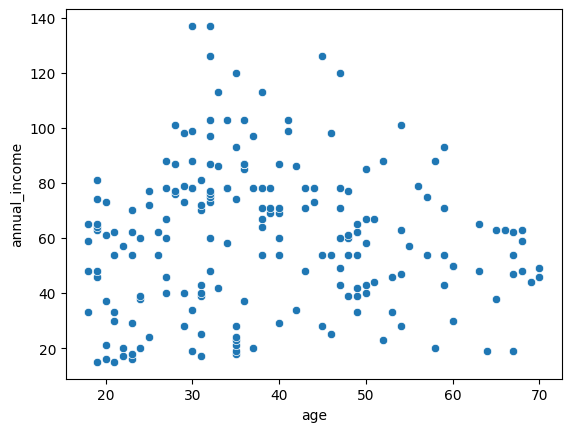

In [6]:
print(df.columns)  # Print the available columns
sns.scatterplot(x='age', y='annual_income', data=df)


<Axes: xlabel='annual_income', ylabel='spending_score'>

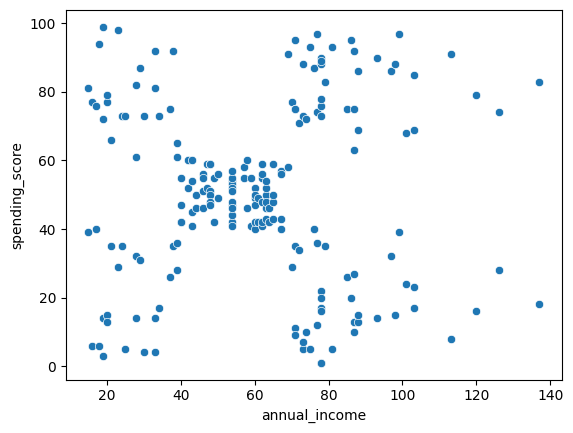

In [7]:
sns.scatterplot(x='annual_income', y='spending_score', data=df)


<Axes: xlabel='age', ylabel='spending_score'>

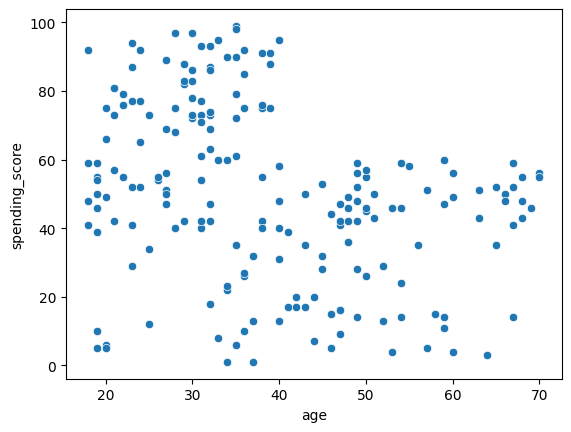

In [8]:
sns.scatterplot(x='age', y='spending_score', data=df)

In [9]:
!pip install scikit-learn

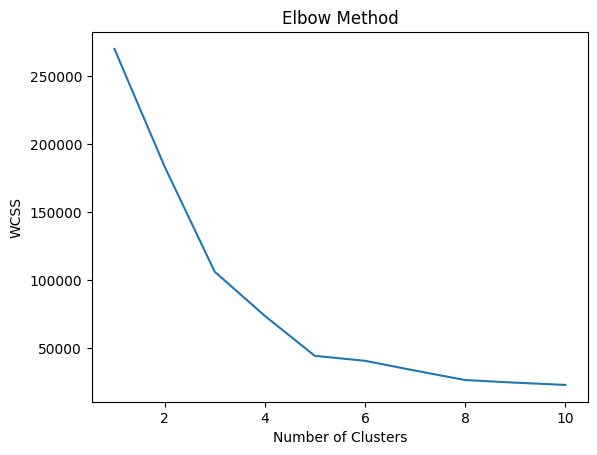

In [16]:
!pip install scikit-learn  # Ensure scikit-learn is installed
import matplotlib.pyplot as plt # This was missing and likely used by the user in earlier cells.  Importing here for completeness
from sklearn.cluster import KMeans # Import KMeans class from sklearn.cluster
X = df[['annual_income', 'spending_score']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42) # Now KMeans should be recognized
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
from sklearn.cluster import KMeans
X=df[['age','annual_income','spending_score']]
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

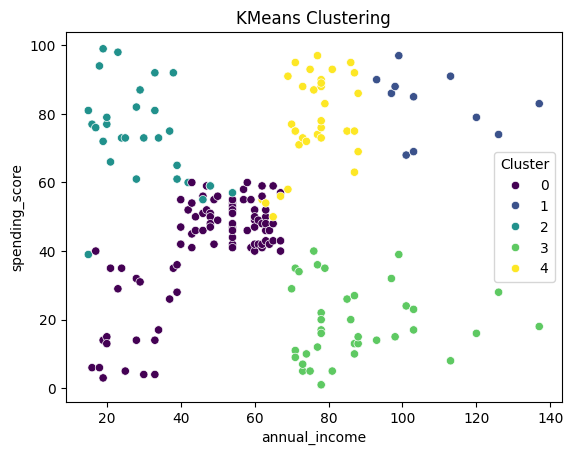

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

Estimated number of clusters: 7
Estimated number of noise points: 41


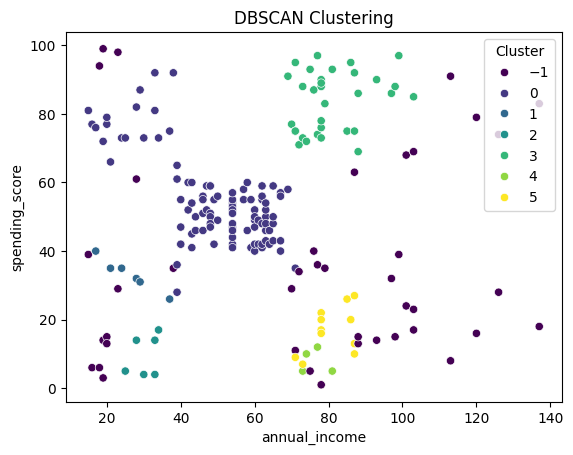

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
dbscan = DBSCAN(eps=11, min_samples=4)  # Adjust eps and min_samples as needed
df['Cluster'] = dbscan.fit_predict(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
n_noise_ = list(df['Cluster']).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")


# Visualize the clusters
sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

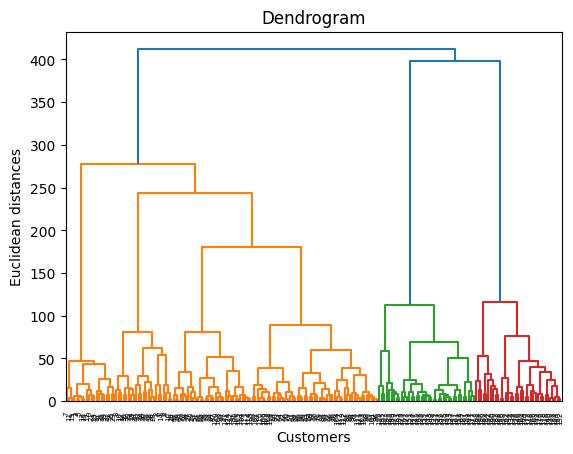

In [20]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
# Remove affinity if linkage='ward' and adjust metric if linkage is not ward
n_clusters = 7
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward') # Use 'ward' linkage

df['Cluster'] = agg_clustering.fit_predict(X)

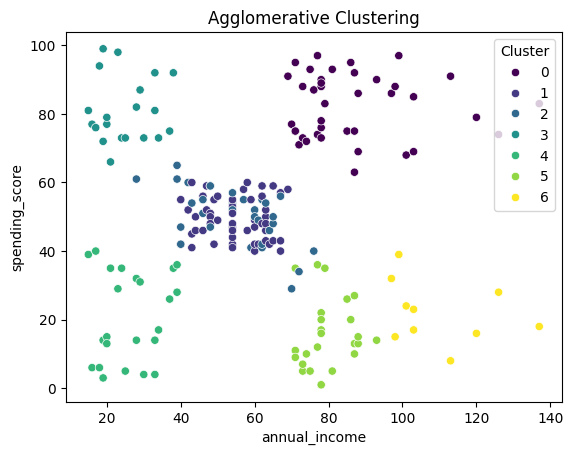

In [23]:
# Visualize the clusters
sns.scatterplot(x='annual_income', y='spending_score', hue='Cluster', data=df, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()
